# Learning Attention-based Embeddings for Relation Prediction in Knowledge Graphs

### Abstract

The recent proliferation of knowledge graphs
(KGs) coupled with incomplete or partial information, in the form of missing relations
(links) between entities, has fueled a lot of
research on knowledge base completion (also
known as relation prediction). Several recent works suggest that convolutional neural
network (CNN) based models generate richer
and more expressive feature embeddings and
hence also perform well on relation prediction.
However, we observe that these KG embeddings treat triples independently and thus fail
to cover the complex and hidden information
that is inherently implicit in the local neighborhood surrounding a triple. To this effect, our
paper proposes a novel attention-based feature
embedding that captures both entity and relation features in any given entity’s neighborhood. Additionally, we also encapsulate relation clusters and multi-hop relations in our
model. Our empirical study offers insights
into the efficacy of our attention-based model
and we show marked performance gains in
comparison to state-of-the-art methods on all
datasets

$=>$ Bài báo nói rằng KG nhúng bộ ba triples độc lập với nhau và vì vậy thất bại để cover những thông tin phức tạp và ẩn được kết thừa từ những hàng xóm cục bộ xung quanh bộ ba
Bái báo đề xuất nhúng theo đặc trưng mà có thể captures đặc trưng của cả entity và relation trong bất kỳ hàng xóm nào. Bên cạnh đó, đề xuất phân loại  encapsulate relation và quan hệ multi-hop trong mô hình của chúng tôi

## 1 Introduction

Knowledge graphs (KGs) represent knowledge
bases (KBs) as a directed graph whose nodes
and edges represent entities and relations between entities, respectively. For example, in Figure 1, a triple (London, capital of, United Kingdom) is represented as two entities: London and
United Kingdom along with a relation (capital of)
linking them. KGs find uses in a wide variety of applications such as semantic search (Berant et al., 2013; Berant and Liang, 2014), dialogue generation (He et al., 2017; Keizer et al.,
2017), and question answering (Zhang et al., 2016;
Diefenbach et al., 2018), to name a few. However, KGs typically suffer from missing relations (Socher et al., 2013a; West et al., 2014).
This problem gives rise to the task of knowledge
base completion (also referred to as relation prediction), which entails predicting whether a given
triple is valid or not.



State-of-the-art relation prediction methods are
known to be primarily knowledge embedding
based models. They are broadly classified
as translational models (Bordes et al., 2013;
Yang et al., 2015; Trouillon et al., 2016) and convolutional neural network (CNN) (Nguyen et al.,
2018; Dettmers et al., 2018) based models. While
translational models learn embeddings using simple operations and limited parameters, they produce low quality embeddings. In contrast, CNN
based models learn more expressive embeddings
due to their parameter efficiency and consideration
of complex relations. However, both translational
and CNN based models process each triple independently and hence (vì thế) fail to encapsulate the semantically rich and latent relations that are inherently
present in the vicinity (lân cận) of a given entity in a KG.

Motivated by the aforementioned observations, we propose a generalized attention-based
graph embedding for relation prediction. For
node classification, graph attention networks
(GATs) (Velickovi ˇ c et al. ´ , 2018) have been shown
to focus on the most relevant portions of the graph,
namely the node features in a 1-hop neighborhood.
Given a KG and the task of relation prediction, our
model generalizes and extends the attention mechanism by guiding attention to both entity (node)
and relation (edge) features in a multi-hop neighborhood of a given entity / node.

Our idea is: 1) to capture multi-hop relations (Lin et al., 2015) surrounding a given
node, 2) to encapsulate the diversity of roles
played by an entity in various relations, and 3)
to consolidate the existing knowledge present in
semantically similar relation clusters (ValverdeRebaza and de Andrade Lopes, 2012). Our model
achieves these objectives by assigning different
weight mass (attention) to nodes in a neighborhood and by propagating attention via layers in
an iterative fashion. However, as the model
depth increases, the contribution of distant entities decreases exponentially. To resolve this issue, we use relation composition as proposed by
(Lin et al., 2015) to introduce an auxiliary edge
between n-hop neighbors, which then readily allows the flow of knowledge between entities. Our
architecture is an encoder-decoder model where
our generalized graph attention model and ConvKB (Nguyen et al., 2018) play the roles of an
encoder and decoder, respectively. Moreover,
this method can be extended for learning effective embeddings for Textual Entailment Graphs
(KOTLERMAN et al., 2015), where global learning has proven effective in the past as shown by
(Berant et al., 2015) and (Berant et al., 2010).

Our contributions are as follows. To the best
of our knowledge, we are the first to learn new
graph attention based embeddings that specifically
target relation prediction on KGs. Secondly, we
generalize and extend graph attention mechanisms
to capture both entity and relation features in a
multi-hop neighborhood of a given entity. Finally, we evaluate our model on challenging relation prediction tasks for a wide variety of realworld datasets. Our experimental results indicate
a clear and substantial improvement over stateof-the-art relation prediction methods. For instance, our attention-based embedding achieves
an improvement of 104% over the state-of-the-art
method for the Hits@1 metric on the popular Freebase (FB15K-237) dataset.

The rest of the paper is structured as follows.
We first provide a 

* Section 2 : Review of related work
* Section 3 : Our detailed approach
* Section 4 : Experimental results and dataset descriptions are followed by our conclusion
* Section 5 : Future research directions

## 2 Related Work

Recently, several variants of KG embeddings have
been proposed for relation prediction. These
methods can be broadly classified as: (i) compositional, (ii) translational, (iii) CNN based, and (iv)
graph based models. 



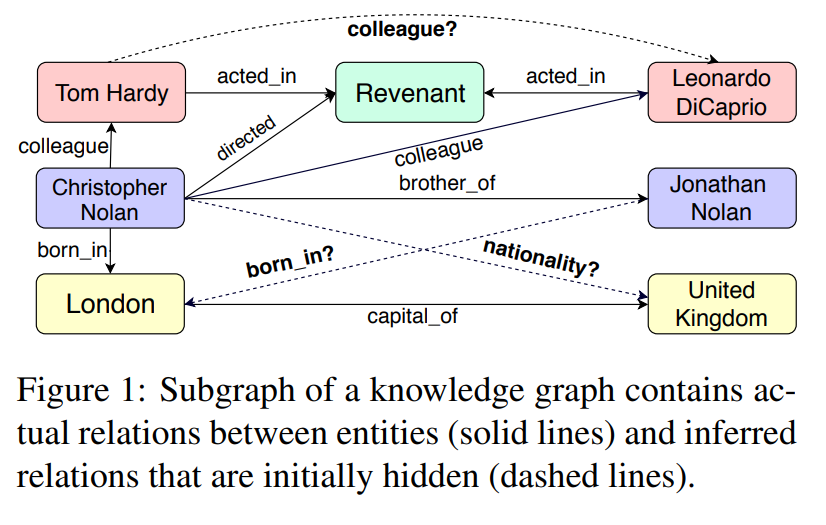

In [3]:
from IPython.display import Image
Image("../../images/kbat/kbat_f1.png")

RESCAL (Nickel et al., 2011),
NTN (Socher et al., 2013b), and the Holographic embedding model (HOLE) (Nickel et al.,
2016) are examples of compositional based models. Both RESCAL and NTN use tensor products
which capture rich interactions, but require a large
number of parameters to model relations and are
thus cumbersome to compute. To combat these
drawbacks, HOLE creates more efficient and
scalable compositional representations using the
circular correlation of entity embeddings.


In comparison, translational models
like TransE (Bordes et al., 2013), DISTMULT (Yang et al., 2015) and ComplEx (Trouillon et al., 2016) propose arguably simpler models.
TransE considers the translation operation
between head and tail entities for relations. DISTMULT (Yang et al., 2015) learns embeddings
using a bilinear diagonal model which is a special
case of the bilinear objective used in NTN and
TransE. DISTMULT uses weighted elementwise dot products to model entity relations.
ComplEx (Trouillon et al., 2016) generalizes
DISTMULT (Yang et al., 2015) by using complex
embeddings and Hermitian dot products instead.
These translational models are faster, require
fewer parameters and are relatively easier to train,
but result in less expressive KG embeddings.

Recently, two CNN based models have
been proposed for relation prediction, namely
ConvE (Dettmers et al., 2018) and ConvKB (Nguyen et al., 2018). ConvE uses 2-D
convolution over embeddings to predict links.
It comprises of a convolutional layer, a fully
connected projection layer and an inner product
layer for the final predictions. Different feature
maps are generated using multiple filters to extract global relationships. Concatenation of these
feature maps represents an input triple. These
models are parameter efficient but consider each triple independently without taking into account
the relationships between the triples.

A graph based neural network model called
R-GCN (Schlichtkrull et al., 2018) is an extension of applying graph convolutional networks
(GCNs) (Kipf and Welling, 2017) to relational
data. It applies a convolution operation to the
neighborhood of each entity and assigns them
equal weights. This graph based model does not
outperform the CNN based models.


Existing methods either learn KG embeddings
by solely focusing on entity features or by taking
into account the features of entities and relations in
a disjoint manner. Instead, our proposed graph attention model holistically captures multi-hop and
semantically similar relations in the n-hop neighborhood of any given entity in the KG.

## 3 Our Approach

We begin this section by introducing the notations
and definitions used in the rest of the paper, followed by a brief background on graph attention
networks (GATs) (Velickovi ˇ c et al. ´ , 2018). Finally, we describe our proposed attention architecture for knowledge graphs followed by our decoder network.

#### 3.1 Background

A knowledge graph is denoted by $G = (E, R)$,
where $E$ and $R$ represent the set of entities
(nodes) and relations (edges), respectively. $A$
triple $(e_s, r, e_o)$ is represented as an edge $r$ between nodes $e_s$ and $e_r$ in $G$
. Embedding models
try to learn an effective representation of entities,
relations, and a scoring function $f$, such that for
a given input triple $t = (e_s, r, e_o)$, $f(t)$ gives the
likelihood of $t$ being a valid triple. For example,
Figure 1 shows the subgraph from a KG which
infers missing links represented by dashed lines
using existing triples such as (London, captial of,
United Kingdom).

#### 3.2 Graph Attention Networks (GATs)

Graph convolutional networks (GCNs)
(Kipf and Welling, 2017) gather information
from the entity’s neighborhood and all neighbors
contribute equally in the information passing. To address the shortcomings of GCNs,
(Velickovi ˇ c et al. ´ , 2018) introduced graph attention networks (GATs). GATs learn to assign
varying levels of importance to nodes in every
node’s neighborhood, rather than treating all
neighboring nodes with equal importance, as is
done in GCN

The input feature set of nodes to a layer is $x = {\vec{x}_1, \vec{x}_2, ..., \vec{x}_N }$. A layer produces a transformed
set of node feature vectors $x' = {\vec{x}'_1, \vec{x}'_2, ..., \vec{x}'_N }$,
where $\vec{x}_i$ and $\vec{x}_i$ are input and output embeddings of the entity $e_i$, and $N$ is number of entities
(nodes). A single GAT layer can be described as

$$
e_{ij} = a(W \vec{x}_i, \vec{x}_j)\hspace{3cm}(1)
$$

where $e_{ij}$ is the attention value of the edge $(e_i, e_j )$ in $G$, $W$ is a parametrized linear transformation
matrix mapping the input features to a higher dimensional output feature space, and a is any attention function of our choosing.

Attention values for each edge are the importance of the edge $(ei, ej)$0
s features for a source
node ei
. Here, the relative attention αij is computed using a softmax function over all the values in the neighborhood. Equation 2 shows the
output of a layer. GAT employs multi-head attention to stabilize the learning process as credited to
(Vaswani et al., 2017).